In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge,Lasso,RidgeCV,ElasticNet,ElasticNetCV,LassoCV,LinearRegression
import seaborn as sns


# Reading CSV file

In [215]:
df = pd.read_csv('AP_details.csv')

In [216]:
data_type = df.dtypes
data_type

ChannelBandwidth         int64
Freq                     int64
Level                    int64
RSSI                     int64
SSID                    object
Secured                  int64
_id                     object
channel_utilisation    float64
count                    int64
distance               float64
rxbytes                  int64
rxpackets                int64
txbytes                  int64
txpackets                int64
dtype: object

In [217]:
df.head()

,ChannelBandwidth,Freq,Level,RSSI,SSID,Secured,_id,channel_utilisation,count,distance,rxbytes,rxpackets,txbytes,txpackets
0,0,2447,6,-50,AndroidWifi,0,646f148ee7929cfb00046137,9.722222,3,3.082237,182686,270,66588,263
1,0,2447,6,-50,AndroidWifi,0,646f1498e7929cfb00046138,9.722222,4,3.082237,182686,270,66588,263
2,0,2412,0,-95,Shan,2,646f14ece7929cfb00046139,0.000000,0,556.061333,521148474,528509,58537457,257923
3,1,2472,5,-59,K B Naidu,2,646f14ece7929cfb0004613a,6.944444,0,8.599071,521148474,528509,58537555,257924
4,0,2437,6,-49,ACT102653773551,2,646f14ede7929cfb0004613b,9.722222,0,2.758319,521148474,528509,58537845,257927


In [218]:
df.drop(['_id'], axis=1, inplace=True)


In [219]:
df.shape

(10731, 13)

In [220]:
df.describe()

,ChannelBandwidth,Freq,Level,RSSI,Secured,channel_utilisation,count,distance,rxbytes,rxpackets,txbytes,txpackets
count,10731.000000,10731.000000,10731.000000,10731.000000,10731.000000,1.061400e+04,10731.000000,10731.000000,1.073100e+04,1.073100e+04,1.073100e+04,1.073100e+04
mean,0.842699,3596.092163,2.262604,-79.259994,1.966639,inf,0.281241,130.108085,1.406143e+09,1.454946e+06,1.910782e+08,7.656500e+05
std,0.889332,1472.432268,1.718546,12.706503,0.256156,NaN,3.246982,124.949306,5.347642e+08,5.378128e+05,6.967043e+07,2.766277e+05
min,0.000000,2412.000000,0.000000,-98.000000,0.000000,0.000000e+00,0.000000,0.138243,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,2432.000000,1.000000,-89.000000,2.000000,1.388889e+00,0.000000,34.372566,1.221729e+09,1.257278e+06,1.613917e+08,6.299780e+05
50%,1.000000,2462.000000,2.000000,-82.000000,2.000000,4.166667e+00,0.000000,92.941562,1.683440e+09,1.735124e+06,2.261483e+08,9.067390e+05
75%,2.000000,5220.000000,3.000000,-73.000000,2.000000,1.388889e+01,0.000000,192.509220,1.734379e+09,1.791479e+06,2.331925e+08,9.322370e+05
max,2.000000,5825.000000,6.000000,-23.000000,2.000000,inf,81.000000,777.399883,3.067675e+09,2.751649e+06,3.805474e+08,1.595411e+06


In [221]:
df = df[(df.rxbytes != 0) & (df.rxpackets != 0) & (df.txbytes != 0) & (df.txpackets != 10)]


In [222]:
df.shape

(10720, 13)

In [223]:
df.describe()

,ChannelBandwidth,Freq,Level,RSSI,Secured,channel_utilisation,count,distance,rxbytes,rxpackets,txbytes,txpackets
count,10720.000000,10720.000000,10720.000000,10720.000000,10720.000000,1.060300e+04,10720.000000,10720.000000,1.072000e+04,1.072000e+04,1.072000e+04,1.072000e+04
mean,0.843284,3597.288526,2.262220,-79.262407,1.966604,inf,0.280410,130.082937,1.407586e+09,1.456439e+06,1.912743e+08,7.664357e+05
std,0.889486,1472.713528,1.718068,12.703362,0.256285,NaN,3.248014,124.961832,5.331370e+08,5.360642e+05,6.943662e+07,2.756796e+05
min,0.000000,2412.000000,0.000000,-98.000000,0.000000,0.000000e+00,0.000000,0.138243,8.478000e+03,4.000000e+01,7.777000e+03,6.900000e+01
25%,0.000000,2432.000000,1.000000,-89.000000,2.000000,1.388889e+00,0.000000,34.372566,1.221744e+09,1.257319e+06,1.614041e+08,6.300075e+05
50%,1.000000,2462.000000,2.000000,-82.000000,2.000000,4.166667e+00,0.000000,92.941562,1.683440e+09,1.735125e+06,2.261496e+08,9.067410e+05
75%,2.000000,5220.000000,3.000000,-73.000000,2.000000,1.388889e+01,0.000000,192.509220,1.734379e+09,1.791479e+06,2.331925e+08,9.322370e+05
max,2.000000,5825.000000,6.000000,-23.000000,2.000000,inf,81.000000,777.399883,3.067675e+09,2.751649e+06,3.805474e+08,1.595411e+06


In [224]:
weight = 0.65

# NScore = (pow((100+RSSI)/10, 2)) + (Freq/1000) + (1 + (14/1 + 0.02 * distance)) + count + ChannelBandwidth - (weight * channelUtilization)
# countBonus = 0

df['count'] = df['count'].where(df['count']<5, other=5)
df['NScore']  = ((100+df['RSSI'])/10)*((100+df['RSSI'])/10) + df['Freq']/1000 + (1+ (14/1 + 0.02*df['distance'])) + df['count'] + df['ChannelBandwidth'] - (weight * df['channel_utilisation'])
    

In [225]:
df['trafficScore'] = np.log2(df['rxbytes']) + np.log2(df['rxpackets']) + np.log2(df['txbytes']) + np.log2(df['txpackets'])
rang = max(df['trafficScore'])-min(df['trafficScore'])
scale = 12 / rang
mini = min(df['trafficScore'])
df['trafficScore'] = ((df['trafficScore'] -mini)*scale)+1

df['Score'] = df['NScore']+df['trafficScore']


In [226]:
df.describe()

,ChannelBandwidth,Freq,Level,RSSI,Secured,channel_utilisation,count,distance,rxbytes,rxpackets,txbytes,txpackets,NScore,trafficScore,Score
count,10720.000000,10720.000000,10720.000000,10720.000000,10720.000000,1.060300e+04,10720.000000,10720.000000,1.072000e+04,1.072000e+04,1.072000e+04,1.072000e+04,1.060300e+04,10720.000000,1.060300e+04
mean,0.843284,3597.288526,2.262220,-79.262407,1.966604,inf,0.077052,130.082937,1.407586e+09,1.456439e+06,1.912743e+08,7.664357e+05,-inf,12.155538,-inf
std,0.889486,1472.713528,1.718068,12.703362,0.256285,NaN,0.592924,124.961832,5.331370e+08,5.360642e+05,6.943662e+07,2.756796e+05,NaN,1.106556,NaN
min,0.000000,2412.000000,0.000000,-98.000000,0.000000,0.000000e+00,0.000000,0.138243,8.478000e+03,4.000000e+01,7.777000e+03,6.900000e+01,-inf,1.000000,-inf
25%,0.000000,2432.000000,1.000000,-89.000000,2.000000,1.388889e+00,0.000000,34.372566,1.221744e+09,1.257319e+06,1.614041e+08,6.300075e+05,1.729320e+01,12.175685,2.966574e+01
50%,1.000000,2462.000000,2.000000,-82.000000,2.000000,4.166667e+00,0.000000,92.941562,1.683440e+09,1.735125e+06,2.261496e+08,9.067410e+05,2.246222e+01,12.545830,3.486559e+01
75%,2.000000,5220.000000,3.000000,-73.000000,2.000000,1.388889e+01,0.000000,192.509220,1.734379e+09,1.791479e+06,2.331925e+08,9.322370e+05,2.626482e+01,12.578904,3.869124e+01
max,2.000000,5825.000000,6.000000,-23.000000,2.000000,inf,5.000000,777.399883,3.067675e+09,2.751649e+06,3.805474e+08,1.595411e+06,7.041032e+01,13.000000,8.222916e+01


In [227]:
distinct_count = df['NScore'].value_counts()
distinct_count

-inf          143
 26.272347    109
 41.189200     89
 27.159937     82
 26.943856     71
             ... 
-8.391973       1
 8.580831       1
 23.412019      1
 24.561553      1
 22.431583      1
Name: NScore, Length: 1065, dtype: int64

In [228]:
df = df[df.NScore != min(df['NScore'])]

In [229]:
df.shape

(10577, 16)

In [230]:
df.drop(['NScore','trafficScore'], axis = 1, inplace=True)


In [231]:
df.shape

(10577, 14)

In [232]:
df.head()

,ChannelBandwidth,Freq,Level,RSSI,SSID,Secured,channel_utilisation,count,distance,rxbytes,rxpackets,txbytes,txpackets,Score
0,0,2447,6,-50,AndroidWifi,0,9.722222,3,3.082237,182686,270,66588,263,42.329827
1,0,2447,6,-50,AndroidWifi,0,9.722222,4,3.082237,182686,270,66588,263,43.329827
2,0,2412,0,-95,Shan,2,0.000000,0,556.061333,521148474,528509,58537457,257923,39.961166
3,1,2472,5,-59,K B Naidu,2,6.944444,0,8.599071,521148474,528509,58537555,257924,42.118033
4,0,2437,6,-49,ACT102653773551,2,9.722222,0,2.758319,521148474,528509,58537845,257927,48.360667


In [233]:
df.describe()

,ChannelBandwidth,Freq,Level,RSSI,Secured,channel_utilisation,count,distance,rxbytes,rxpackets,txbytes,txpackets,Score
count,10577.000000,10577.000000,10577.000000,10577.000000,10577.000000,10460.000000,10577.000000,10577.000000,1.057700e+04,1.057700e+04,1.057700e+04,1.057700e+04,10460.000000
mean,0.854685,3575.184173,2.274180,-79.170370,1.966153,12.411701,0.078094,130.522714,1.413265e+09,1.462075e+06,1.918399e+08,7.686212e+05,32.212163
std,0.890021,1470.130245,1.725512,12.758785,0.257982,21.347581,0.596851,125.693709,5.297087e+08,5.323962e+05,6.885159e+07,2.730386e+05,11.253650
min,0.000000,2412.000000,0.000000,-98.000000,0.000000,0.000000,0.000000,0.138243,8.478000e+03,4.000000e+01,7.777000e+03,6.900000e+01,-54.933024
25%,0.000000,2432.000000,1.000000,-89.000000,2.000000,1.388889,0.000000,32.976911,1.221969e+09,1.257759e+06,1.614684e+08,6.301430e+05,29.891641
50%,1.000000,2462.000000,2.000000,-82.000000,2.000000,4.166667,0.000000,92.941562,1.684192e+09,1.736390e+06,2.263750e+08,9.078670e+05,34.903360
75%,2.000000,5220.000000,3.000000,-72.000000,2.000000,13.888889,0.000000,193.291142,1.734379e+09,1.791479e+06,2.331925e+08,9.322370e+05,38.715687
max,2.000000,5825.000000,6.000000,-23.000000,2.000000,166.666667,5.000000,777.399883,3.067675e+09,2.751649e+06,3.805474e+08,1.595411e+06,82.229165


# Data Processing


rxbytes: This value represents the total number of bytes received by the WiFi network interface. This can be an indicator of the amount of data that has been downloaded or received by the device. The higher the value of rxbytes, the more data has been received by the device.

rxpackets: This value represents the total number of packets received by the WiFi network interface. A packet is a unit of data that is transmitted over a network. The higher the value of rxpackets, the more packets have been received by the device.

txbytes: This value represents the total number of bytes transmitted by the WiFi network interface. This can be an indicator of the amount of data that has been uploaded or sent by the device. The higher the value of txbytes, the more data has been sent by the device.

txpackets: This value represents the total number of packets transmitted by the WiFi network interface. The higher the value of txpackets, the more packets have been sent by the device.



Analyzing from csv file, we got to know there are many rows which are similare so we dropped them

In [234]:
df['Score'] = df['Score'].round(2)
df['Score']

0        42.33
1        43.33
2        39.96
3        42.12
4        48.36
         ...  
10726    33.58
10727    42.04
10728    42.04
10729    25.86
10730    43.04
Name: Score, Length: 10577, dtype: float64

In [235]:
df = df.drop_duplicates(subset=["SSID","ChannelBandwidth","Freq","Level","Secured","channel_utilisation","count","distance","rxbytes","rxpackets","txbytes","txpackets"], keep=False) 

dropping the rows who have same score and SSID and 

In [236]:
df

,ChannelBandwidth,Freq,Level,RSSI,SSID,Secured,channel_utilisation,count,distance,rxbytes,rxpackets,txbytes,txpackets,Score
0,0,2447,6,-50,AndroidWifi,0,9.722222,3,3.082237,182686,270,66588,263,42.33
1,0,2447,6,-50,AndroidWifi,0,9.722222,4,3.082237,182686,270,66588,263,43.33
2,0,2412,0,-95,Shan,2,0.000000,0,556.061333,521148474,528509,58537457,257923,39.96
3,1,2472,5,-59,K B Naidu,2,6.944444,0,8.599071,521148474,528509,58537555,257924,42.12
4,0,2437,6,-49,ACT102653773551,2,9.722222,0,2.758319,521148474,528509,58537845,257927,48.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10724,1,2462,1,-88,Sagar1,2,1.388889,0,243.339130,1222534510,1259155,162088516,631730,36.04
10725,2,5220,4,-68,Admin5G,2,55.555556,0,11.477029,1222534510,1259155,162088516,631730,8.76
10726,0,2427,3,-77,Kancha,2,4.166667,0,69.571317,1222534510,1259155,162088516,631730,33.58
10729,1,2412,1,-88,LIVSMT-RO-02C8,2,1.388889,0,248.383474,44890,83,42904,69,25.86


In [237]:
df.shape

(10067, 14)

In [238]:
df.isnull().sum()

ChannelBandwidth         0
Freq                     0
Level                    0
RSSI                     0
SSID                   638
Secured                  0
channel_utilisation    115
count                    0
distance                 0
rxbytes                  0
rxpackets                0
txbytes                  0
txpackets                0
Score                  115
dtype: int64

In [239]:
df=df.dropna(subset=["channel_utilisation"])

In [240]:
df.shape

(9952, 14)

Number of rows decreased from 5978 to 167

In [241]:
distinct_count = df['Score'].value_counts()
distinct_count

38.82    65
29.53    64
33.87    59
2.33     55
33.98    55
         ..
35.62     1
42.29     1
28.63     1
25.18     1
28.54     1
Name: Score, Length: 1345, dtype: int64

Only distinct rows left for same score too

In [242]:
distinct_count = df['Level'].value_counts()
distinct_count

1    2716
2    2396
3    1448
0    1263
4     734
6     718
5     677
Name: Level, dtype: int64

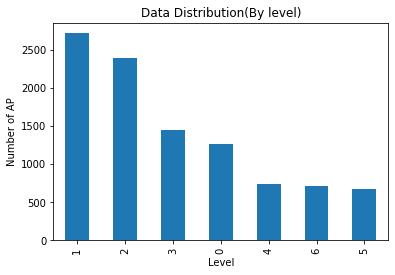

In [243]:
distinct_count.plot.bar()

# Set the title and labels
plt.title("Data Distribution(By level)")
plt.xlabel("Level")
plt.ylabel("Number of AP")

# Show the plot
plt.show()

In [244]:
distinct_count = df['count'].value_counts()
distinct_count

0    9847
5      48
1      18
2      17
4      14
3       8
Name: count, dtype: int64

This shows the number of access point already connected to that access point

2    9841
0     111
Name: Secured, dtype: int64


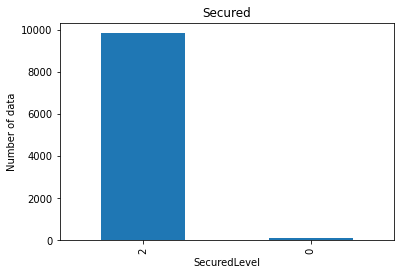

In [245]:
distinct_count = df['Secured'].value_counts()
distinct_count.plot.bar(x=["True", "False"])

print(distinct_count)
# Set the title and labels
plt.title("Secured")
plt.xlabel("SecuredLevel")
plt.ylabel("Number of data")

# Show the plot
plt.show()

Majority of the access points are secured and this shows column is biased

In [246]:
Freq24 = df['Freq'][df['Freq'] < 5000].count()
Freq54 = df['Freq'][df['Freq'] > 5000].count()
print('2.4Ghz: ',Freq24)
print('5.4Ghz: ',Freq54)    

2.4Ghz:  6234
5.4Ghz:  3718


In [247]:
distinct_count = df['ChannelBandwidth'].value_counts()
distinct_count   

0    4673
2    3379
1    1900
Name: ChannelBandwidth, dtype: int64

In [248]:
distinct_count = df['channel_utilisation'].value_counts()
distinct_count   

0.000000      2038
1.388889      1317
2.777778      1250
4.166667      1049
13.888889      904
5.555556       691
27.777778      561
8.333333       482
6.944444       406
83.333333      401
41.666667      297
69.444444      179
55.555556      163
9.722222       159
97.222222       40
166.666667       9
111.111111       3
138.888889       3
Name: channel_utilisation, dtype: int64

In [249]:
df[df['channel_utilisation']==0]

,ChannelBandwidth,Freq,Level,RSSI,SSID,Secured,channel_utilisation,count,distance,rxbytes,rxpackets,txbytes,txpackets,Score
2,0,2412,0,-95,Shan,2,0.0,0,556.061333,521148474,528509,58537457,257923,39.96
5,1,2457,0,-94,Karunakar,2,0.0,0,486.513441,521148474,528509,58537845,257927,39.73
7,0,2412,0,-95,Shan,2,0.0,0,556.061333,521370780,528877,58606944,258277,39.96
10,1,2457,0,-94,Karunakar,2,0.0,0,486.513441,521377141,528884,58609197,258285,39.73
12,0,2412,0,-95,Shan,2,0.0,0,556.061333,521429332,528969,58625650,258354,39.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10702,2,5745,1,-92,ACT102651527101_5g,2,0.0,0,165.276066,1222463715,1258993,162043399,631635,38.87
10711,2,5745,0,-94,motorola one action 8478,2,0.0,0,208.070239,1222498680,1259073,162065615,631681,39.44
10713,2,5745,0,-93,NICE,2,0.0,0,185.442796,1222499571,1259074,162066207,631682,39.12
10715,2,5260,0,-94,ACT102674980767_5g,2,0.0,0,227.255423,1222499571,1259074,162066207,631682,39.34


In [250]:
indexes = df[df.channel_utilisation == 0].sample(frac=0.5).index
df = df.drop(indexes)

In [251]:
df.shape

(8933, 14)

In [252]:
df.describe()

,ChannelBandwidth,Freq,Level,RSSI,Secured,channel_utilisation,count,distance,rxbytes,rxpackets,txbytes,txpackets,Score
count,8933.000000,8933.000000,8933.000000,8933.000000,8933.000000,8933.000000,8933.000000,8933.000000,8.933000e+03,8.933000e+03,8.933000e+03,8.933000e+03,8933.000000
mean,0.831300,3496.967536,2.473525,-77.738162,1.979850,13.819390,0.041643,112.765837,1.460628e+09,1.508428e+06,1.975752e+08,7.910452e+05,31.379680
std,0.885948,1453.264140,1.666595,12.300183,0.199746,22.221895,0.418786,111.487021,4.800638e+08,4.848433e+05,6.273097e+07,2.490887e+05,11.574521
min,0.000000,2412.000000,0.000000,-97.000000,0.000000,0.000000,0.000000,0.138243,8.478000e+03,4.000000e+01,7.777000e+03,6.900000e+01,-54.930000
25%,0.000000,2432.000000,1.000000,-87.000000,2.000000,1.388889,0.000000,27.869084,1.455472e+09,1.262814e+06,1.619603e+08,6.314640e+05,29.600000
50%,1.000000,2457.000000,2.000000,-80.000000,2.000000,4.166667,0.000000,81.878568,1.684975e+09,1.737737e+06,2.266864e+08,9.088660e+05,34.560000
75%,2.000000,5220.000000,3.000000,-71.000000,2.000000,13.888889,0.000000,163.369222,1.734455e+09,1.791642e+06,2.332409e+08,9.323240e+05,37.240000
max,2.000000,5825.000000,6.000000,-23.000000,2.000000,166.666667,5.000000,700.039743,3.067675e+09,2.751649e+06,3.805438e+08,1.595400e+06,82.230000


2    2396
1    2331
3    1448
4     734
6     718
5     677
0     629
Name: Level, dtype: int64


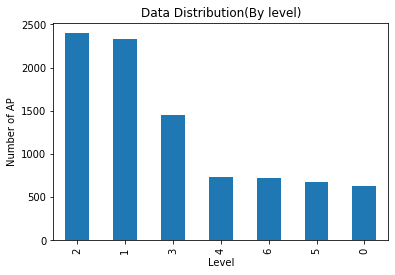

In [256]:
distinct_count = df['Level'].value_counts()
print(distinct_count)
distinct_count.plot.bar()

# Set the title and labels
plt.title("Data Distribution(By level)")
plt.xlabel("Level")
plt.ylabel("Number of AP")

# Show the plot
plt.show()

In [257]:
indexes = df[df.Level == 1].sample(frac=0.7).index
df = df.drop(indexes)

In [258]:
indexes = df[df.Level == 2].sample(frac=0.7).index
df = df.drop(indexes)

In [259]:
indexes = df[df.Level == 3].sample(frac=0.5).index
df = df.drop(indexes)

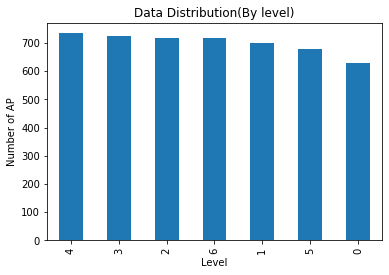

In [260]:
distinct_count = df['Level'].value_counts()
distinct_count.plot.bar()

# Set the title and labels
plt.title("Data Distribution(By level)")
plt.xlabel("Level")
plt.ylabel("Number of AP")

# Show the plot
plt.show()

In [261]:
df.describe()

,ChannelBandwidth,Freq,Level,RSSI,Secured,channel_utilisation,count,distance,rxbytes,rxpackets,txbytes,txpackets,Score
count,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4.900000e+03,4.900000e+03,4.900000e+03,4.900000e+03,4900.000000
mean,0.811429,3517.996327,3.048571,-73.329592,1.969796,17.592120,0.061429,98.243285,1.485469e+09,1.534172e+06,2.010757e+08,8.050004e+05,31.379867
std,0.895175,1480.307381,1.972895,14.407497,0.243943,27.131346,0.519572,128.818596,4.628831e+08,4.686804e+05,6.050300e+07,2.402213e+05,14.240697
min,0.000000,2412.000000,0.000000,-97.000000,0.000000,0.000000,0.000000,0.138243,8.478000e+03,4.000000e+01,7.777000e+03,6.900000e+01,-54.930000
25%,0.000000,2422.000000,1.000000,-86.000000,2.000000,2.777778,0.000000,7.854575,1.558835e+09,1.584916e+06,1.984321e+08,8.116620e+05,29.620000
50%,0.000000,2452.000000,3.000000,-74.000000,2.000000,5.555556,0.000000,39.122827,1.685218e+09,1.738289e+06,2.269278e+08,9.093110e+05,35.455000
75%,2.000000,5220.000000,5.000000,-60.000000,2.000000,13.888889,0.000000,139.676292,1.732690e+09,1.788476e+06,2.325224e+08,9.298842e+05,39.720000
max,2.000000,5825.000000,6.000000,-23.000000,2.000000,166.666667,5.000000,700.039743,3.067652e+09,2.751583e+06,3.805438e+08,1.595400e+06,82.230000


RSSI column mean is -72 which indicates most of the Access point values strength is fairly strong


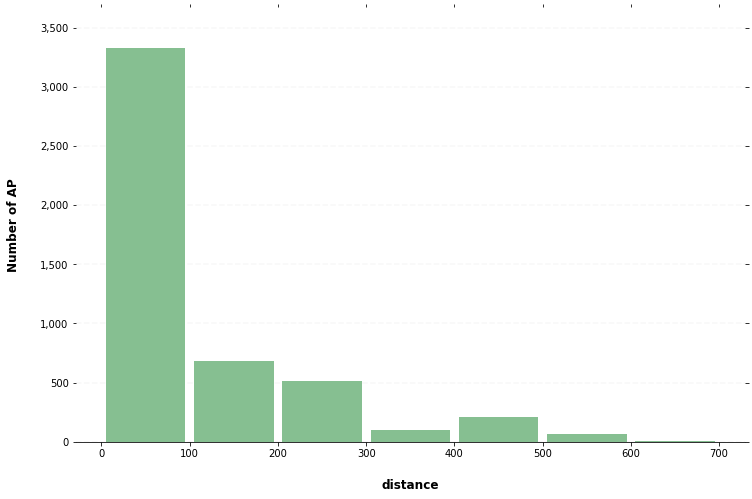

In [262]:
from matplotlib.ticker import StrMethodFormatter

ax = df.hist(column='distance', bins=7, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("distance", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Number of AP", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

This indicates majority of data's distance is less than 50

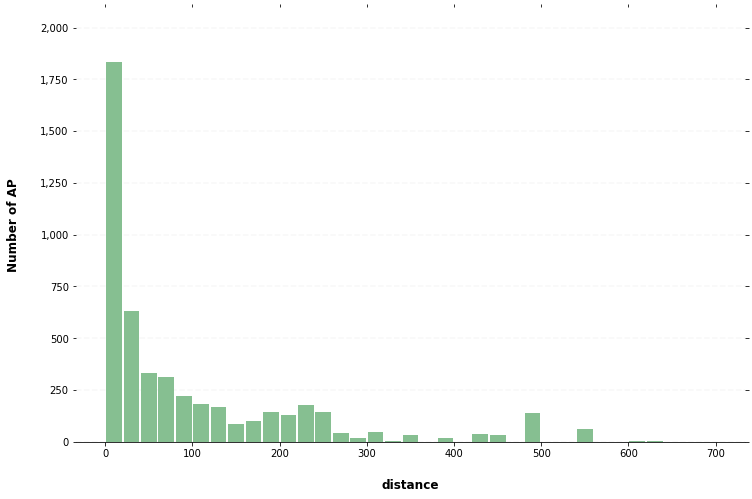

In [263]:
from matplotlib.ticker import StrMethodFormatter

ax = df.hist(column='distance', bins=35, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("distance", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Number of AP", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

this indicates most of the data taken has distance less than 10 unit

In [264]:
dist1 = df['distance'][df['distance'] < 1].count()
dist1

11

In [265]:
df.drop(['SSID','Secured','Level'], axis=1, inplace=True)


In [266]:
df.head()

,ChannelBandwidth,Freq,RSSI,channel_utilisation,count,distance,rxbytes,rxpackets,txbytes,txpackets,Score
0,0,2447,-50,9.722222,3,3.082237,182686,270,66588,263,42.33
1,0,2447,-50,9.722222,4,3.082237,182686,270,66588,263,43.33
3,1,2472,-59,6.944444,0,8.599071,521148474,528509,58537555,257924,42.12
4,0,2437,-49,9.722222,0,2.758319,521148474,528509,58537845,257927,48.36
8,1,2472,-59,6.944444,0,8.599071,521370780,528880,58607523,258281,42.12


In [267]:
df.to_csv('final.csv')


In [268]:
df.shape

(4900, 11)

# Model training

In [269]:
#label
data_y = np.array(df['Score'])
df= df.drop('Score', axis = 1)
#features
feature_list = list(df.columns)
data_x = np.array(df)

In [270]:
data_x.shape

(4900, 10)

In [271]:
x = df[['ChannelBandwidth','Freq','RSSI','channel_utilisation','count','distance','rxbytes','rxpackets','txbytes','txpackets']]
x.columns

Index(['ChannelBandwidth', 'Freq', 'RSSI', 'channel_utilisation', 'count',
       'distance', 'rxbytes', 'rxpackets', 'txbytes', 'txpackets'],
      dtype='object')

In [272]:
data_x

array([[ 0.00000000e+00,  2.44700000e+03, -5.00000000e+01, ...,
         2.70000000e+02,  6.65880000e+04,  2.63000000e+02],
       [ 0.00000000e+00,  2.44700000e+03, -5.00000000e+01, ...,
         2.70000000e+02,  6.65880000e+04,  2.63000000e+02],
       [ 1.00000000e+00,  2.47200000e+03, -5.90000000e+01, ...,
         5.28509000e+05,  5.85375550e+07,  2.57924000e+05],
       ...,
       [ 2.00000000e+00,  5.22000000e+03, -6.80000000e+01, ...,
         1.25915500e+06,  1.62088516e+08,  6.31730000e+05],
       [ 1.00000000e+00,  2.41200000e+03, -8.80000000e+01, ...,
         8.30000000e+01,  4.29040000e+04,  6.90000000e+01],
       [ 0.00000000e+00,  2.43700000e+03, -5.10000000e+01, ...,
         8.30000000e+01,  4.29040000e+04,  6.90000000e+01]])

In [273]:
data_y

array([42.33, 43.33, 42.12, ...,  8.76, 25.86, 43.04])

In [274]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)


# RandomForest

In [310]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
{'n_estimators': [160],'max_depth': [4,6,8],'max_features': [2,4,6,8,9,10],'min_samples_split': [2,4,5]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [4, 6, 8],
                          'max_features': [2, 4, 6, 8, 9, 10],
                          'min_samples_split': [2, 4, 5],
                          'n_estimators': [160]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [311]:
# {'max_depth': 8, 'max_features': 9, 'min_samples_split': 2, 'n_estimators': 8}

grid_search.best_params_

{'max_depth': 8,
 'max_features': 8,
 'min_samples_split': 2,
 'n_estimators': 160}

decreasing the n_estimators MSE is getting reduces but the fitted curve totally overshadow test data
increasing the n_estimators MSE is getting increased

In [312]:
from sklearn.metrics import mean_squared_error

y_pred = grid_search.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)

Mean squared error:  0.30860728665698367


In [313]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

print("R-squared:", r2)

R-squared: 0.9983790304646654


In [314]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 0.29 degrees.
Accuracy: 98.58 %.


In [315]:
y_pred

array([ 34.53902946,  40.1743914 ,   7.85505719,  35.18841504,
        19.49771699,  34.19026812,   6.86676419,  40.16047552,
        39.35107801,   4.76053997,  35.06533942,  44.71609083,
         9.49414753,  43.15871299,  33.63251613,  35.1860814 ,
        34.58758975,  37.19104547,  -1.03961025,  34.51042535,
        35.99054619,  42.17446126,  37.40304821,  29.53179388,
        41.27204546,  43.15871299,  38.96044944,  38.35442423,
        21.64632386,  48.48838007,  34.05675327,  39.29335339,
        35.1860814 ,  40.01643987,  40.15685218,  40.11277728,
        20.68101435,  34.58758975,  39.66923927,  41.29394193,
        29.53472708,  29.18940245,  33.14966707,  14.44383966,
         5.36103644,   3.4198265 ,  35.16215475,  10.12741192,
        34.16184702,  42.17446126,   0.74747802,  41.50569723,
        37.1157648 ,   2.0737367 ,  29.53113877,  -0.86461199,
        45.20132915,  21.12780578,  21.64492898,  38.80931248,
        44.04773833,  21.10514047,  41.99959467,  34.89

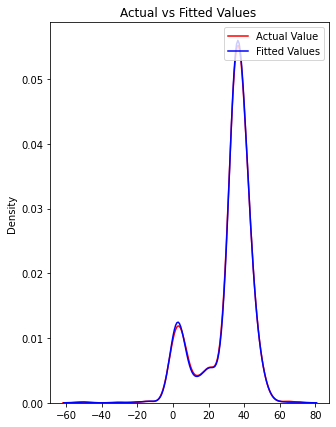

In [316]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(y_pred, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values ')
# Add a legend
plt.legend(loc='upper right')


plt.show()
plt.close()

In [317]:
from sklearn.feature_selection import mutual_info_regression

# Get the feature importances
best_reg = grid_search.best_estimator_
importances = best_reg.feature_importances_

# Get the information gain
info_gain = mutual_info_regression(data_x, data_y)

# Print the feature importances and information gain
print("Feature Importances:", importances)
print("Information Gain:", info_gain)


Feature Importances: [1.77414066e-02 9.02920031e-02 5.65784133e-02 7.68986698e-01
 1.75416344e-04 6.18022272e-02 1.12298549e-03 6.97893723e-04
 1.25614401e-03 1.34681244e-03]
Information Gain: [0.76529822 1.32483764 3.05163158 2.17441663 0.02872113 4.00716883
 1.71725019 1.6552273  1.54953154 1.60496866]


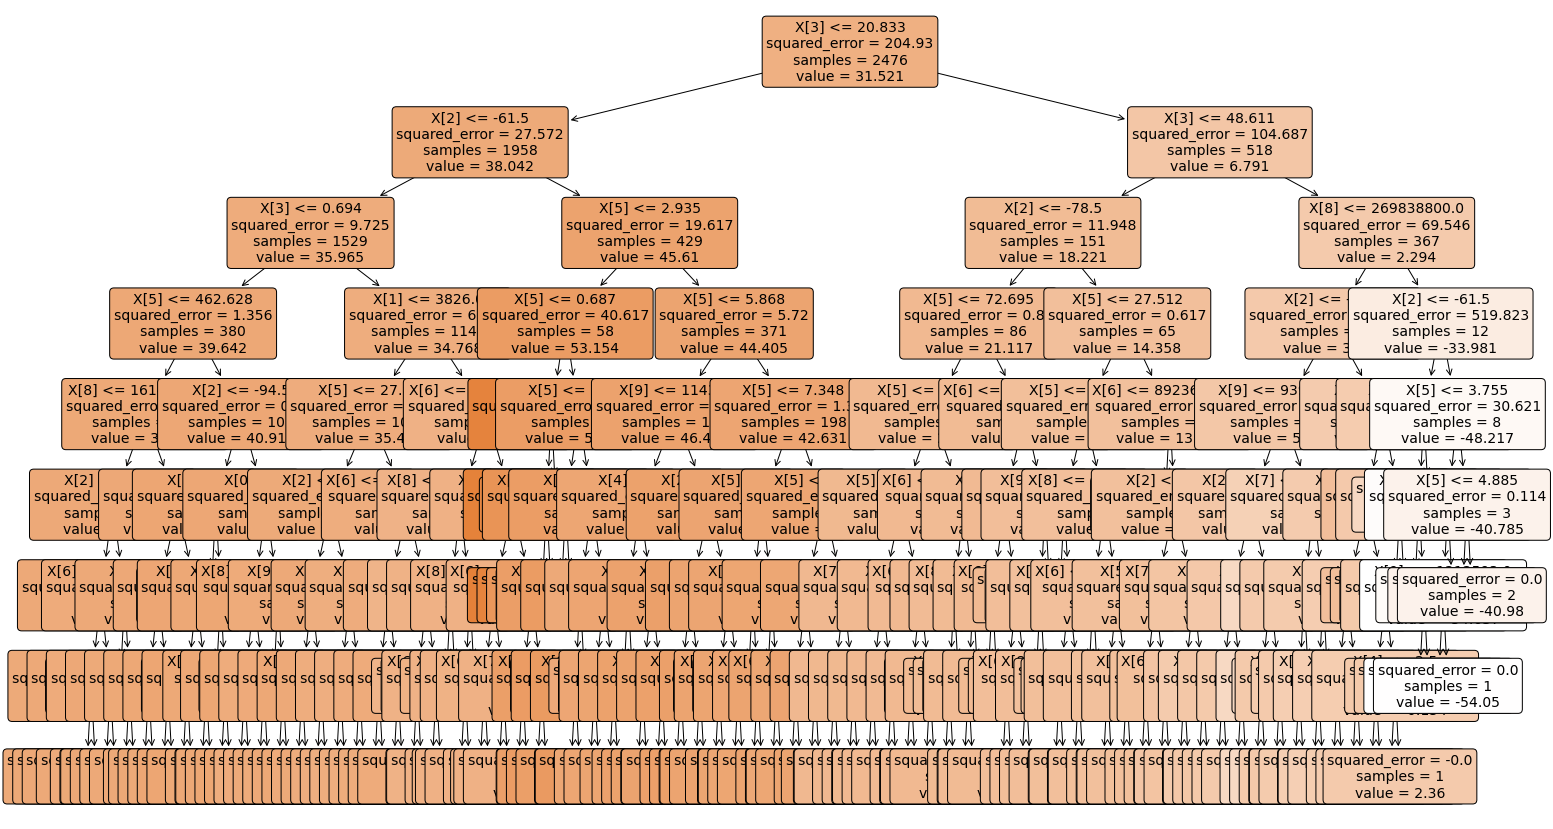

In [318]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
Tree = best_reg.estimators_[0]

# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Tree,filled=True, 
              rounded=True, 
              fontsize=14);

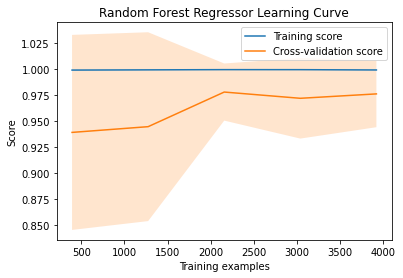

In [319]:
from sklearn.model_selection import learning_curve

# Compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(best_reg, data_x, data_y, cv=5, n_jobs=-1)

# Compute the mean and standard deviation of the training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Create a plot of the learning curve
plt.plot(train_sizes, train_mean, label="Training score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label="Cross-validation score")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Random Forest Regressor Learning Curve")
plt.legend(loc="best")
plt.show()

# Saving the model


Joblib

In [320]:
# Save your model
import joblib
joblib.dump(best_reg, 'RandomForest.pkl')
print("Model dumped!")

Model dumped!


In [249]:
# Load the model that you just saved
RF = joblib.load('RandomForest.pkl')

testy = RF.predict([[-74,5745,2,2238650202,1873649,155886468,7831
                     16,3.0,20.807024]])
testy

array([38.99357143])

In [321]:
print(x.columns)

Index(['ChannelBandwidth', 'Freq', 'RSSI', 'channel_utilisation', 'count',
       'distance', 'rxbytes', 'rxpackets', 'txbytes', 'txpackets'],
      dtype='object')


In [322]:
model_columns = list(x.columns)
joblib.dump(model_columns, 'columns.pkl')

['columns.pkl']

pickle

In [253]:
import pickle
filename = 'RandomForest_pickle.pkl'
with open(filename, 'wb') as file:
    pickle.dump(best_reg, file)

In [254]:
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)
result = loaded_model.predict([[-74,5745,2,2238650202,1873649,155886468,783116,3.0,20.807024]])

print(result)

[38.99357143]


In [257]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# Specify an initial type for the model ( similar to input shape for the model )
initial_type = [ 
    ( 'input_study_hours' , FloatTensorType( [None,1] ) ) 
]

# Write the ONNX model to disk
converted_model = convert_sklearn( best_reg , initial_types=initial_type )
with open( "sklearn_model.onnx", "wb" ) as f:
    f.write( converted_model.SerializeToString() )

# DecisionTreeRegressor

In [258]:

from sklearn.tree import DecisionTreeRegressor

param_grid = [
{'max_depth': [4,8,12],'max_features': [2,4, 6,8,10,11],'min_samples_split': [2,4, 5],
'min_samples_leaf':[2,4,6,8]}
]
forest_reg = DecisionTreeRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [4, 8, 12],
                          'max_features': [2, 4, 6, 8, 10, 11],
                          'min_samples_leaf': [2, 4, 6, 8],
                          'min_samples_split': [2, 4, 5]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [259]:
grid_search.best_params_

{'max_depth': 12,
 'max_features': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 4}

In [260]:
from sklearn.metrics import mean_squared_error

y_pred = grid_search.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)

Mean squared error:  5.59306380718954


In [261]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

print("R-squared:", r2)

R-squared: 0.9506744747444519


In [262]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 1.85 degrees.
Accuracy: 95.76 %.


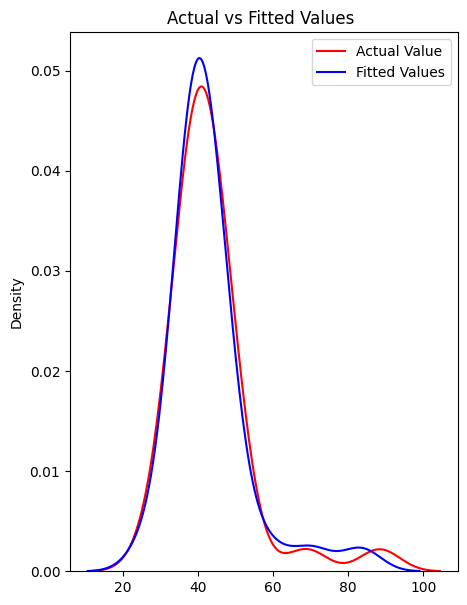

In [263]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.kdeplot(y_test, color="r", label="Actual Value")
sns.kdeplot(y_pred, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values ')
# Add a legend
plt.legend(loc='upper right')


plt.show()
plt.close()

In [264]:
from sklearn.feature_selection import mutual_info_regression


best_DR = grid_search.best_estimator_ 

importances = best_DR.feature_importances_

# Get the information gain
info_gain = mutual_info_regression(data_x, data_y)

# Print the feature importances and information gain
print("Feature Importances:", importances)
print("Information Gain:", info_gain)


Feature Importances: [0.00120022 0.0049017  0.00130806 0.01583952 0.16456394 0.01451746
 0.00529515 0.05843363 0.73394032]
Information Gain: [0.52958672 0.07756116 0.04455727 0.52849426 0.52663462 0.53642884
 0.52761107 0.08437971 0.43650162]


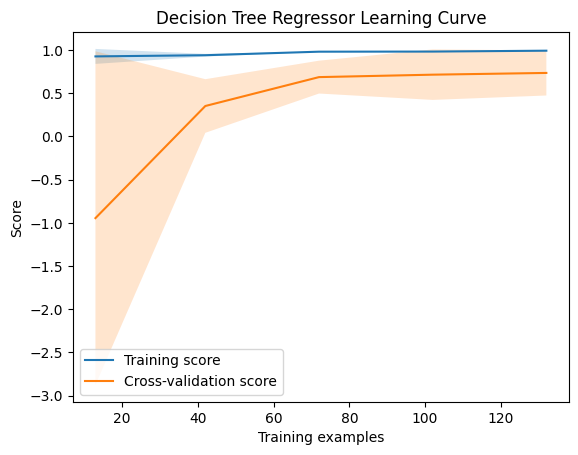

In [270]:
from sklearn.model_selection import learning_curve

# Compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(best_DR, data_x, data_y, cv=5, n_jobs=-1)

# Compute the mean and standard deviation of the training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Create a plot of the learning curve
plt.plot(train_sizes, train_mean, label="Training score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label="Cross-validation score")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.title("Decision Tree Regressor Learning Curve")
plt.legend(loc="best")
plt.show()

# Saving the model


In [268]:
filename = 'DecisionTree.pkl'
with open(filename, 'wb') as file:
    pickle.dump(best_reg, file)

In [269]:
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)
result = loaded_model.predict([[-74,5745,2,2238650202,1873649,155886468,783116,3.0,20.807024]])

print(result)

[38.99357143]


In [ ]:
x.columns